In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import math

$λ$: Taxa de chegada

$μ$: Taxa de atendimento / velocidade do servidor

$ρ$: Percentual de tempo que o sistema permanece ocupado Marcos

$w$: Tempo médio de permanência do cliente no sistema (Fila + Atendimento) Marcos

$w_q$:Tempo médio de permanência do cliente na fila OK

$L$: Média de clientes no sistema  THI

$L_q$: Média de clientes na fila THI

$π_n$: Probabilidade de haver n clientes na fila. 

In [5]:
# Parâmetros do experimento
conf_level = 0.95 # nível de confiança desejado
mean_arrival_time = 1 # taxa de chegada
mean_departure_time = 2 #taxa de saida

In [8]:
def simulador(simulation_total_time, mean_arrival_time, mean_departure_time):
    n = 0
    simul_time = 0
    # To calculate waiting line mean time
    arrivals = []
    waiting_line_time = 0
    number_of_arrivals = 0

    while(simul_time < simulation_total_time):
        arrival_time = np.random.exponential(scale=1/mean_arrival_time)
        departure_time = np.random.exponential(scale=1/mean_departure_time)

        if n == 0 or arrival_time < departure_time:
            simul_time += arrival_time
            # print(f"{simul_time:8.4f} \t\t{'Chegada':14} {n:2} => {n+1:2}")
            number_of_arrivals +=1
            n += 1
            if (n > 1):
                arrivals.append(simul_time)
        else:
            simul_time += departure_time
            if (len(arrivals) > 0):
                waiting_line_time += simul_time - arrivals[0]
                arrivals.pop(0)
            # print(f"{simul_time:8.4f} \t\t{'Saída':14} {n:2} => {n-1:2}")
            n -= 1
    
    wq = waiting_line_time/number_of_arrivals
    return wq

In [48]:
def simulator_confidence_interval(sample_size):
    """
    Simula o processo de fila m/m/1 um intervalo de confiança para tempo médio de espera na fila.

    sample_size: tamanho da amostra para a simulação
    confidence_level: nível de confiança desejado para o intervalo de confiança

    Retorna um intervalo de confiança para o tempo médio de espera na fila.
    """
    results = [simulador(300, 1, 2) for _ in range(sample_size)]

    # Intervalo de Confiança
    x_barra = np.sum(results) / sample_size
    z = 1.96
    s = np.std(results)
    limite_inferior = x_barra - z*s/math.sqrt(sample_size)
    limite_superior = x_barra + z*s/math.sqrt(sample_size)

    return (limite_inferior, limite_superior), results

In [49]:
intervalo, data = simulator_confidence_interval(4000)
print(intervalo)

(0.48035417954691056, 0.4897843344844354)


c:\Users\Marcos Eduardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

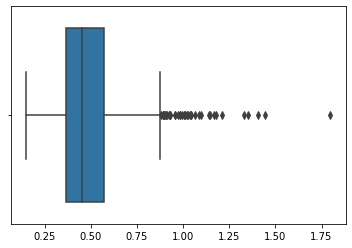

In [44]:
sns.boxplot(data)

In [45]:
px.histogram(data, nbins=75)

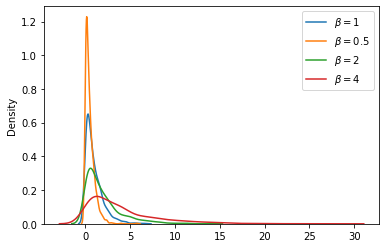

In [32]:

# Click on Run Code button to see the result

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different exponential distribution
sns.kdeplot(np.random.exponential(1, size))
sns.kdeplot(np.random.exponential(0.5, size))
sns.kdeplot(np.random.exponential(2, size))
sns.kdeplot(np.random.exponential(4, size))

plt.legend([r"$\beta = 1$", 
            r"$\beta = 0.5$", 
            r"$\beta = 2$",
            r"$\beta = 4$"])
plt.show()
